##### Looking back on celebrity deaths within the last 10 years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### First lets explore the data!

In [2]:
celeb_deaths = pd.read_csv('../input/celebrity_deaths_3.csv')
celeb_deaths.head()

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,fame_score
0,85,1921,natural causes,January,2006,businessman chairman of IBM (1973–1981),Frank Cary,American,6030.0
1,49,1957,murdered,January,2006,musician (House of Freaks Gutterball),Bryan Harvey,American,5867.0
2,64,1942,Alzheimer's disease,January,2006,baseball player (Oakland Athletics),Paul Lindblad,American,6711.0
3,86,1920,Alzheimer's disease,January,2006,politician Representative from Oregon (1957–1...,Charles O. Porter,American,6330.0
4,82,1924,cancer,January,2006,nightclub owner (Tropicana Club),Ofelia Fox,Cuban,4353.0


In [3]:
celeb_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21438 entries, 0 to 21437
Data columns (total 9 columns):
age               21438 non-null int64
birth_year        21438 non-null int64
cause_of_death    8972 non-null object
death_month       21438 non-null object
death_year        21438 non-null int64
famous_for        21420 non-null object
name              21438 non-null object
nationality       21438 non-null object
fame_score        21380 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.5+ MB


##### There is alot of missing values for Cause of Death.
##### Nonetheless, I will see what the most common causes of death are for the values we have.

In [4]:
celeb_deaths.cause_of_death.value_counts().iloc[:20]

 cancer                         1120
 heart attack                    738
 heart failure                   388
 natural causes                  295
 lung cancer                     266
 pneumonia                       241
 stroke                          229
 after long illness              185
 pancreatic cancer               177
 traffic collision               146
 Alzheimer's disease             146
 cardiac arrest                  129
 shot                            115
 prostate cancer                 108
 leukemia                         91
 Parkinson's disease              87
 complications from a stroke      85
 brain cancer                     83
 liver cancer                     81
 breast cancer                    64
Name: cause_of_death, dtype: int64

### It looks like most celebrities tend to die from some form of cancer or heart failure.

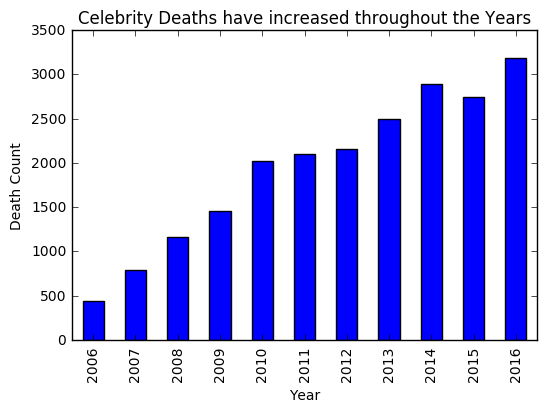

In [5]:
celeb_deaths.death_year.value_counts().sort_index().plot(kind = 'bar')
plt.title('Celebrity Deaths have increased throughout the Years')
plt.ylabel('Death Count')
plt.xlabel('Year')
plt.show()

In [6]:
by_death_year = celeb_deaths.groupby(['death_year']).mean()
print('Overall Average Age of Death:', round(by_death_year.age.mean(),1))

Overall Average Age of Death: 75.7


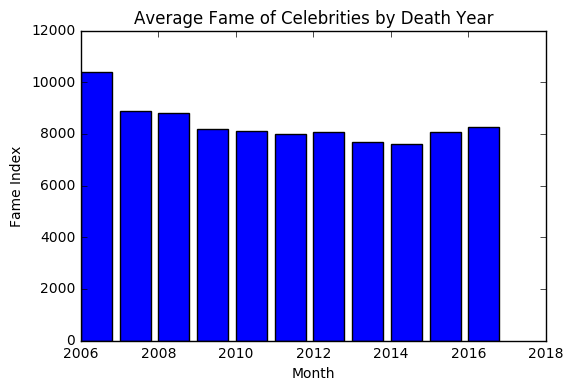

In [7]:
plt.bar(by_death_year.index, by_death_year.fame_score)
plt.title('Average Fame of Celebrities by Death Year')
plt.ylabel('Fame Index')
plt.xlabel('Month')
plt.show()

### 2006 stands out as a year when many stand out celebrities passed away

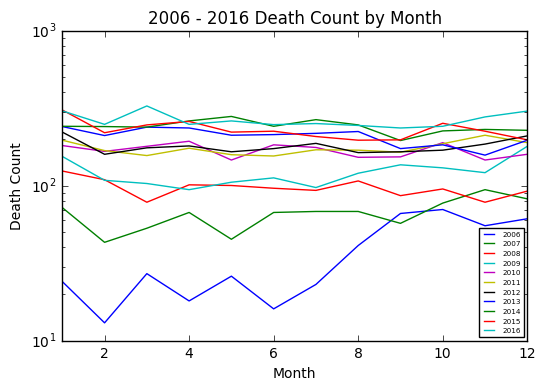

In [8]:
months_map = {'death_month':{'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,\
          'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}}

for year in celeb_deaths.death_year.unique():
    deaths_by_year = celeb_deaths[celeb_deaths.death_year == year]
    deaths_by_year = deaths_by_year.replace(months_map)
    deaths_by_year.death_month.value_counts().sort_index().plot(kind = 'line', label = year)
plt.legend(loc = 'lower right',prop = {'size':5.2})
plt.ylabel('Death Count')
plt.xlabel('Month')
plt.yscale('log')
plt.title('2006 - 2016 Death Count by Month')
plt.show()

### It looks like in every year, no particular month stood out as a month where an extraordinary amount of celebrities passed away... with exception to 2006, where it looks like late in the year, an unprecidented amount of celebrities passed away.

## Lets take a look at the Top 10 most famous celebrities to pass away by Year:

In [9]:
for year in celeb_deaths.death_year.unique():
    deaths_by_year = celeb_deaths[celeb_deaths.death_year == year]
    mean = deaths_by_year.fame_score.mean()
    std = np.std(deaths_by_year.fame_score)
    deaths_by_year['fame_score_standard'] = (deaths_by_year.fame_score - mean)/std
    top_celebs = deaths_by_year[deaths_by_year.fame_score_standard >= 2]
    top_celebs.sort_values('fame_score_standard', ascending = False, inplace = True)
    print(top_celebs[['name', 'death_year']].head(10))

                       name  death_year
429             Gerald Ford        2006
435          Saddam Hussein        2006
398        Augusto Pinochet        2006
363           Robert Altman        2006
80   John Kenneth Galbraith        2006
78              Jane Jacobs        2006
315            Red Auerbach        2006
320            Nigel Kneale        2006
195             Steve Irwin        2006
44             Gordon Parks        2006
                   name  death_year
1216     Benazir Bhutto        2007
1115          Ian Smith        2007
658       Boris Yeltsin        2007
523       Frankie Laine        2007
1083      Norman Mailer        2007
854      Ingmar Bergman        2007
1137        Sean Taylor        2007
804   Lady Bird Johnson        2007
1218         Jaan Kross        2007
848         James David        2007
                        name  death_year
1300           Bobby Fischer        2008
1858             Jesse Helms        2008
2367           Harold Pinter        2008
